In [1]:
import pandas as pd 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import os
os.chdir("C:/Users/Lenovo/Downloads")

In [3]:
A=pd.read_csv("50_Startups.csv")

In [4]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
A.skew()

RND       0.164002
ADMIN    -0.489025
MKT      -0.046472
PROFIT    0.023291
dtype: float64

In [6]:
A.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure,subplot,xlabel,ylabel
from seaborn import scatterplot

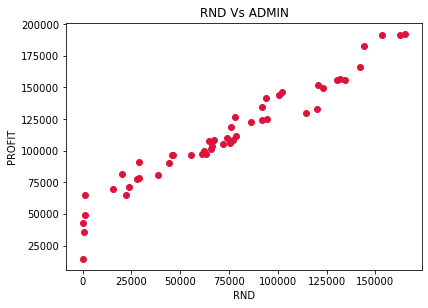

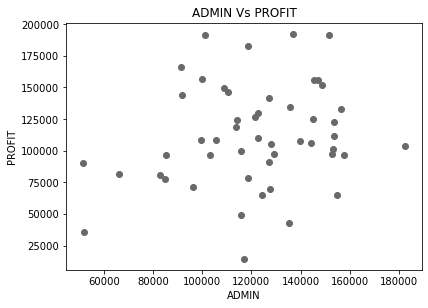

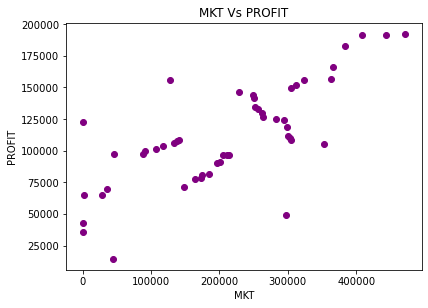

In [8]:
figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.scatter(A.RND,A.PROFIT,color="crimson")
plt.xlabel("RND")
plt.ylabel("PROFIT")
plt.title("RND Vs ADMIN")
plt.show()
 
figure(figsize=(14,10))
plt.subplot(2,2,2)
plt.scatter(A.ADMIN,A.PROFIT,color="dimgrey")
plt.xlabel("ADMIN")
plt.ylabel("PROFIT")
plt.title("ADMIN Vs PROFIT")
plt.show()

figure(figsize=(14,10))
plt.subplot(2,2,3)
plt.scatter(A.MKT,A.PROFIT,color="purple")
plt.xlabel("MKT")
plt.ylabel("PROFIT")
plt.title("MKT Vs PROFIT")
plt.show()

<AxesSubplot:xlabel='MKT', ylabel='PROFIT'>

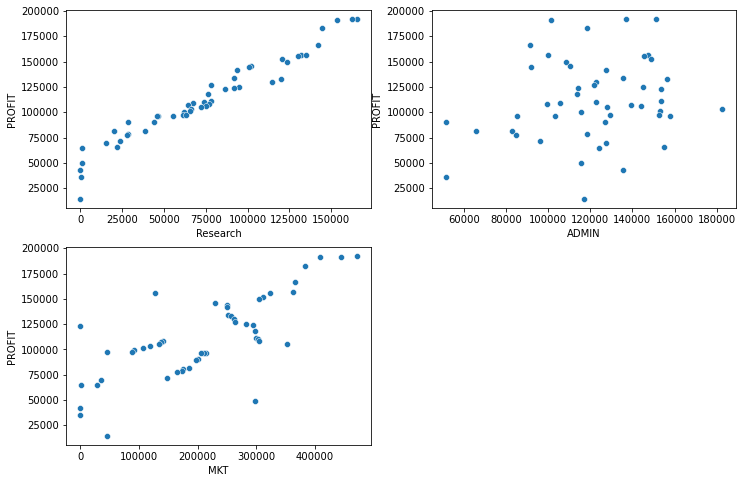

In [9]:
figure(figsize=(12,8))
subplot(2,2,1)
scatterplot(A.RND,A.PROFIT)
xlabel("Research")

subplot(2,2,2)
scatterplot(A.ADMIN,A.PROFIT)

subplot(2,2,3)
scatterplot(A.MKT,A.PROFIT)

In [10]:
from seaborn import boxplot
import seaborn as sb

<AxesSubplot:xlabel='STATE', ylabel='PROFIT'>

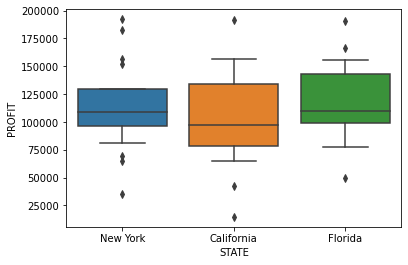

In [11]:
boxplot(A.STATE,A.PROFIT,whis=0.5)

# Find Outlier

In [12]:
import numpy as np

In [13]:
def find_outliers(pd,col):
    pd = pd[[col]]
    x = round(pd[col].mean(),2)
    pd['STD'] = np.abs(pd[col] - x)
    pd['STD3'] = pd[col].std()*3
    return pd[pd['STD'] > pd.STD3][[col]]

In [14]:
find_outliers(A,"PROFIT")

,PROFIT


In [15]:
find_outliers(A,"RND")

,RND


In [16]:
find_outliers(A,"ADMIN")

,ADMIN


In [17]:
find_outliers(A,"MKT")

,MKT


# Linear Regression

catgorical columns converted into o and 1 formate

In [18]:
X=pd.get_dummies(A.STATE)

In [19]:
X1=A[["RND","MKT","ADMIN"]]

In [20]:
X=X1.join(X)

In [21]:
Y=A[["PROFIT"]]

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

In [23]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [24]:
from sklearn.metrics import mean_absolute_error,explained_variance_score
print("MAE:",round(mean_absolute_error(ytest,pred),4))
print("EVS:",round(explained_variance_score(ytest,pred),4))

MAE: 5830.8379
EVS: 0.9556


In [25]:
Y = A[["PROFIT"]]
X = A[["RND","MKT","ADMIN"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
print("MAE:",round(mean_absolute_error(ytest,pred),2))
print("AdjRsquared:",round(explained_variance_score(ytest,pred),2))

MAE: 5784.32
AdjRsquared: 0.96


In [27]:
from statsmodels.api import OLS,add_constant
const=add_constant(xtrain)
OLS(ytrain,const).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     199.2
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.80e-22
Time:                        15:19:34   Log-Likelihood:                -421.72
No. Observations:                  40   AIC:                             851.4
Df Residuals:                      36   BIC:                             858.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.802e+04   7425.664      6.467      0.000     3.3e+04    6.31e+04
RND            0.8114      0.054     14.903      0.000       0.701       0.922
MKT            0.0303      0.021      1.479      0.148      -0.011       0.072
ADMIN         -0.0160      0.059     -0.273      0.786      -0.135       0.103
==============================================================================
Omnibus:                       11.886   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.854
Skew:                          -0.873   Prob(JB):                     0.000595
Kurtosis:                       5.421   Cond. No.                     1.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
A=pd.read_csv("C:/Users/Lenovo/Desktop/50_Startups.csv")

In [31]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [32]:
A1=pd.get_dummies(A.STATE)

In [33]:
B=A.drop(labels=["STATE"],axis=1)

In [34]:
B1=B.join(A1)

In [35]:
Y=B1[["PROFIT"]]
X=B1.drop(labels=["PROFIT"],axis=1)

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

# MLP Regression

In [37]:
from sklearn.neural_network import MLPRegressor
mlpr=MLPRegressor(hidden_layer_sizes=(20,20),random_state=21)
model=mlpr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

In [38]:
from sklearn.metrics import mean_absolute_error
tr_err=round(mean_absolute_error(tr_pred,ytrain),4)
ts_err=round(mean_absolute_error(ts_pred,ytest),4)

In [39]:
print(tr_err)
print(ts_err)

11311.876
12166.8038


In [40]:
def NN_Reg(xtrain,xtest,ytrain,ytest,Z):
    nn=Z.fit(xtrain,ytrain)
    tr_pred=nn.predict(xtrain)
    ts_pred=nn.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err=round(mean_absolute_error(tr_pred,ytrain),4)
    ts_err=round(mean_absolute_error(ts_pred,ytest),4)
    print(tr_err)
    print(ts_err)

In [41]:
for i in range(2,50,1):
    for j in range(2,50,1):
        mlpr = MLPRegressor(hidden_layer_sizes=(i,j),random_state=21)
        print("==========",i,"=========",j,"=========")
        NN_Reg(xtrain,xtest,ytrain,ytest,mlpr)

========== 2 ========= 2 =========
95659.2015
120419.0942
========== 2 ========= 3 =========
101429.698
131840.2244
========== 2 ========= 4 =========
107372.5313
135320.7245
========== 2 ========= 5 =========
106066.4637
135319.3335
========== 2 ========= 6 =========
99240.1885
124063.8872
========== 2 ========= 7 =========
95854.871
117609.3547
========== 2 ========= 8 =========
89174.2281
110361.1402
========== 2 ========= 9 =========
101608.0003
132753.1024
========== 2 ========= 10 =========
101611.8587
132790.3057
========== 2 ========= 11 =========
94256.6323
114026.5731
========== 2 ========= 12 =========
93749.0029
113434.7192
========== 2 ========= 13 =========
101571.3013
131681.2914
========== 2 ========= 14 =========
92952.701
112596.4275
========== 2 ========= 15 =========
100384.4148
127635.4435
========== 2 ========= 16 =========
87191.0458
105556.308
========== 2 ========= 17 =========
92934.4205
112212.0439
========== 2 ========= 18 =========
84097.2464
101824.6599
==

29047.3527
39994.7652
========== 4 ========= 48 =========
29251.6691
40389.9684
========== 4 ========= 49 =========
28922.1213
40039.1666
========== 5 ========= 2 =========
22538.6906
19990.0725
========== 5 ========= 3 =========
24956.4634
37093.5797
========== 5 ========= 4 =========
13464.6909
15749.0969
========== 5 ========= 5 =========
18747.948
8804.5036
========== 5 ========= 6 =========
25578.1674
31325.5655
========== 5 ========= 7 =========
19307.5209
21171.6384
========== 5 ========= 8 =========
27515.1817
36371.3695
========== 5 ========= 9 =========
12899.1791
18660.513
========== 5 ========= 10 =========
17297.3323
18811.4771
========== 5 ========= 11 =========
30217.2161
44710.7647
========== 5 ========= 12 =========
16816.7696
15263.5263
========== 5 ========= 13 =========
14701.1773
14067.0388
========== 5 ========= 14 =========
13337.4817
14163.0622
========== 5 ========= 15 =========
12670.1928
17266.224
========== 5 ========= 16 =========
20096.683
16627.6039
=====

16501.8489
30167.049
========== 7 ========= 48 =========
12376.6362
22398.6701
========== 7 ========= 49 =========
14097.2919
25513.7051
========== 8 ========= 2 =========
106185.2376
135319.3498
========== 8 ========= 3 =========
24161.9264
29784.6546
========== 8 ========= 4 =========
25936.5796
31002.8293
========== 8 ========= 5 =========
12949.5398
22233.1859
========== 8 ========= 6 =========
15528.1364
22922.1807
========== 8 ========= 7 =========
25422.3763
31854.1162
========== 8 ========= 8 =========
14811.0753
21751.5443
========== 8 ========= 9 =========
56372.5618
84335.4449
========== 8 ========= 10 =========
22098.1929
23239.3851
========== 8 ========= 11 =========
14901.287
25938.1821
========== 8 ========= 12 =========
19507.5836
27833.1128
========== 8 ========= 13 =========
25858.1622
32469.2756
========== 8 ========= 14 =========
20393.3107
27415.646
========== 8 ========= 15 =========
11762.2734
17679.4004
========== 8 ========= 16 =========
29348.2102
47342.2117
=

11418.7912
15634.3256
========== 10 ========= 46 =========
12274.1697
17920.6624
========== 10 ========= 47 =========
22545.1946
32601.1876
========== 10 ========= 48 =========
17338.7862
29827.8911
========== 10 ========= 49 =========
20667.5883
25563.8744
========== 11 ========= 2 =========
106186.8218
134784.283
========== 11 ========= 3 =========
16222.2365
22978.7903
========== 11 ========= 4 =========
16608.0161
26706.1263
========== 11 ========= 5 =========
71020.6263
97063.6292
========== 11 ========= 6 =========
15417.4999
16524.9122
========== 11 ========= 7 =========
14311.7623
14344.0818
========== 11 ========= 8 =========
13520.5079
17226.7185
========== 11 ========= 9 =========
22365.6508
25101.7545
========== 11 ========= 10 =========
23207.6223
27656.3817
========== 11 ========= 11 =========
21010.6434
29781.9739
========== 11 ========= 12 =========
12744.7237
14871.3757
========== 11 ========= 13 =========
14158.4754
18648.0733
========== 11 ========= 14 =========
1086

13164.5827
12388.728
========== 13 ========= 42 =========
11601.1083
14567.0101
========== 13 ========= 43 =========
11795.479
10854.9381
========== 13 ========= 44 =========
12808.7899
16609.5357
========== 13 ========= 45 =========
12174.8698
14773.4828
========== 13 ========= 46 =========
12570.1741
14835.7298
========== 13 ========= 47 =========
12964.6406
17194.0027
========== 13 ========= 48 =========
11019.7785
11903.6276
========== 13 ========= 49 =========
12424.3588
18374.8008
========== 14 ========= 2 =========
16666.0624
23303.0806
========== 14 ========= 3 =========
14418.9755
17526.407
========== 14 ========= 4 =========
17324.9873
22512.2854
========== 14 ========= 5 =========
16200.2969
27457.5744
========== 14 ========= 6 =========
16544.9446
26661.3144
========== 14 ========= 7 =========
102514.4615
131296.3651
========== 14 ========= 8 =========
17554.6114
25917.5672
========== 14 ========= 9 =========
11541.6921
16384.7104
========== 14 ========= 10 =========
11035.

11295.752
14721.4391
========== 16 ========= 39 =========
11490.2814
12073.3188
========== 16 ========= 40 =========
11450.3981
12590.5703
========== 16 ========= 41 =========
10987.3964
12526.8172
========== 16 ========= 42 =========
11509.9358
15209.2496
========== 16 ========= 43 =========
11561.9987
16432.4206
========== 16 ========= 44 =========
18538.3593
15254.3974
========== 16 ========= 45 =========
11640.8339
13783.4326
========== 16 ========= 46 =========
11202.1533
13519.4482
========== 16 ========= 47 =========
11184.7411
15212.9617
========== 16 ========= 48 =========
16419.63
20855.1324
========== 16 ========= 49 =========
11640.1672
14824.0954
========== 17 ========= 2 =========
18923.7482
21945.4451
========== 17 ========= 3 =========
13888.6972
20966.411
========== 17 ========= 4 =========
20018.0826
28543.3001
========== 17 ========= 5 =========
27555.7169
40160.9088
========== 17 ========= 6 =========
19169.3714
20635.9605
========== 17 ========= 7 =========
18248.9

11875.0199
16146.4829
========== 19 ========= 35 =========
11223.6285
11538.5091
========== 19 ========= 36 =========
11726.905
13693.4523
========== 19 ========= 37 =========
18395.9618
20234.5429
========== 19 ========= 38 =========
11407.4793
13177.1012
========== 19 ========= 39 =========
20991.5642
18914.7816
========== 19 ========= 40 =========
10858.3034
12245.5064
========== 19 ========= 41 =========
20634.5362
18365.1617
========== 19 ========= 42 =========
19327.0813
16395.5057
========== 19 ========= 43 =========
21302.8589
10426.9469
========== 19 ========= 44 =========
11720.8527
13248.1341
========== 19 ========= 45 =========
18749.1359
17269.2439
========== 19 ========= 46 =========
20165.7631
20591.1624
========== 19 ========= 47 =========
10172.9214
11251.1057
========== 19 ========= 48 =========
11216.4569
11638.7906
========== 19 ========= 49 =========
17000.9474
18825.2664
========== 20 ========= 2 =========
16569.4343
19784.4657
========== 20 ========= 3 =========


10718.9365
13027.6983
========== 22 ========= 33 =========
18123.1169
18899.2848
========== 22 ========= 34 =========
11613.4293
15397.5984
========== 22 ========= 35 =========
25903.3035
30488.0756
========== 22 ========= 36 =========
11136.4195
16324.8494
========== 22 ========= 37 =========
20321.4068
25236.4151
========== 22 ========= 38 =========
21283.8441
17289.1118
========== 22 ========= 39 =========
20189.437
20448.1149
========== 22 ========= 40 =========
21268.2877
31706.7229
========== 22 ========= 41 =========
22168.4737
30571.8177
========== 22 ========= 42 =========
10471.7077
12840.3794
========== 22 ========= 43 =========
24822.953
22941.4891
========== 22 ========= 44 =========
24901.6695
32287.1375
========== 22 ========= 45 =========
24301.8613
27017.2853
========== 22 ========= 46 =========
22273.2118
29472.1474
========== 22 ========= 47 =========
24378.0837
27914.5527
========== 22 ========= 48 =========
26793.3468
23929.4171
========== 22 ========= 49 =========

10328.1716
9875.2675
========== 25 ========= 29 =========
14780.034
14170.4763
========== 25 ========= 30 =========
21315.5316
17496.1592
========== 25 ========= 31 =========
16693.8512
15295.2161
========== 25 ========= 32 =========
17457.5112
14466.3307
========== 25 ========= 33 =========
20865.272
17475.0419
========== 25 ========= 34 =========
11306.5933
13818.3145
========== 25 ========= 35 =========
14819.0022
9076.6323
========== 25 ========= 36 =========
10756.3696
10833.7325
========== 25 ========= 37 =========
11222.0627
10947.9403
========== 25 ========= 38 =========
11008.3092
12215.442
========== 25 ========= 39 =========
20074.3293
22363.9512
========== 25 ========= 40 =========
21947.9805
14826.6324
========== 25 ========= 41 =========
17101.9518
12620.38
========== 25 ========= 42 =========
17666.6059
17101.4358
========== 25 ========= 43 =========
20668.9357
13879.5957
========== 25 ========= 44 =========
17770.4583
15382.3222
========== 25 ========= 45 =========
1842

11270.7999
13295.7778
========== 28 ========= 25 =========
17356.9951
25751.9008
========== 28 ========= 26 =========
16744.1531
13831.4312
========== 28 ========= 27 =========
15273.2892
15457.9243
========== 28 ========= 28 =========
19817.8233
23960.3441
========== 28 ========= 29 =========
19306.5913
14934.8047
========== 28 ========= 30 =========
20241.0238
12978.807
========== 28 ========= 31 =========
19614.2411
18117.8888
========== 28 ========= 32 =========
10552.4778
11439.6875
========== 28 ========= 33 =========
11036.1162
12533.9762
========== 28 ========= 34 =========
19273.0855
11523.5011
========== 28 ========= 35 =========
15996.3891
13697.2693
========== 28 ========= 36 =========
17701.442
10206.2672
========== 28 ========= 37 =========
19411.7595
14454.1447
========== 28 ========= 38 =========
19374.6961
17331.9926
========== 28 ========= 39 =========
17513.1318
10202.6862
========== 28 ========= 40 =========
11395.6453
12756.2792
========== 28 ========= 41 =========

11549.8528
13751.1722
========== 31 ========= 21 =========
10285.3431
10951.6587
========== 31 ========= 22 =========
10586.655
14625.4251
========== 31 ========= 23 =========
10875.3619
11822.4108
========== 31 ========= 24 =========
11511.384
12571.3968
========== 31 ========= 25 =========
17575.5399
16894.6401
========== 31 ========= 26 =========
11335.6462
14634.1196
========== 31 ========= 27 =========
10902.0172
13129.3511
========== 31 ========= 28 =========
10613.0425
11223.7581
========== 31 ========= 29 =========
18235.756
19493.5276
========== 31 ========= 30 =========
18130.3068
21456.1608
========== 31 ========= 31 =========
11170.7718
10108.7917
========== 31 ========= 32 =========
11248.4119
14341.1984
========== 31 ========= 33 =========
11095.9393
12086.9615
========== 31 ========= 34 =========
18057.0282
17967.5308
========== 31 ========= 35 =========
11351.3779
12806.0697
========== 31 ========= 36 =========
16729.6995
21025.9778
========== 31 ========= 37 =========


10976.7097
12548.3258
========== 34 ========= 17 =========
10688.3273
10050.8621
========== 34 ========= 18 =========
21622.1231
20445.5909
========== 34 ========= 19 =========
10227.0368
10141.7033
========== 34 ========= 20 =========
10621.4727
10340.4714
========== 34 ========= 21 =========
20407.564
24599.4626
========== 34 ========= 22 =========
10477.9582
10561.3914
========== 34 ========= 23 =========
18747.5292
17353.4194
========== 34 ========= 24 =========
10552.7533
10079.7475
========== 34 ========= 25 =========
11024.0987
11625.2067
========== 34 ========= 26 =========
22392.9605
25297.1534
========== 34 ========= 27 =========
11701.4454
13641.3414
========== 34 ========= 28 =========
19641.7453
17184.1881
========== 34 ========= 29 =========
20242.2353
19337.9801
========== 34 ========= 30 =========
21452.0423
13109.9555
========== 34 ========= 31 =========
19502.4115
20740.3488
========== 34 ========= 32 =========
19631.0454
18707.1314
========== 34 ========= 33 ========

15399.4305
13591.292
========== 37 ========= 14 =========
17198.2856
10033.0774
========== 37 ========= 15 =========
16230.1058
9435.4993
========== 37 ========= 16 =========
14960.5025
11025.7262
========== 37 ========= 17 =========
11531.4159
11763.8167
========== 37 ========= 18 =========
11448.8431
12651.3054
========== 37 ========= 19 =========
20239.1012
15673.4426
========== 37 ========= 20 =========
10566.3773
10717.2587
========== 37 ========= 21 =========
16612.857
15243.4012
========== 37 ========= 22 =========
10645.246
9880.1463
========== 37 ========= 23 =========
10337.8042
10276.2783
========== 37 ========= 24 =========
20970.1806
16621.2952
========== 37 ========= 25 =========
10995.5351
10779.4913
========== 37 ========= 26 =========
11355.6364
12838.7465
========== 37 ========= 27 =========
10552.3616
11063.9901
========== 37 ========= 28 =========
11144.8517
11181.1528
========== 37 ========= 29 =========
19542.1017
17595.3355
========== 37 ========= 30 =========
19

106185.6455
135412.489
========== 40 ========= 11 =========
12322.8408
13253.2009
========== 40 ========= 12 =========
11578.1224
11900.5425
========== 40 ========= 13 =========
13771.305
19012.8074
========== 40 ========= 14 =========
15157.6792
15433.6879
========== 40 ========= 15 =========
21417.8627
14762.6281
========== 40 ========= 16 =========
11126.8154
9017.9892
========== 40 ========= 17 =========
20312.9792
21029.8288
========== 40 ========= 18 =========
18107.917
17560.3671
========== 40 ========= 19 =========
17685.3579
11276.9681
========== 40 ========= 20 =========
18461.267
18561.4297
========== 40 ========= 21 =========
10168.9769
9327.5432
========== 40 ========= 22 =========
18359.7296
17373.3703
========== 40 ========= 23 =========
16680.5024
13666.28
========== 40 ========= 24 =========
19905.3157
28233.6196
========== 40 ========= 25 =========
11006.5369
11808.5123
========== 40 ========= 26 =========
17043.3591
18096.0593
========== 40 ========= 27 =========
233

11985.0438
16580.192
========== 43 ========= 8 =========
16574.4739
13740.6073
========== 43 ========= 9 =========
17174.807
18857.0963
========== 43 ========= 10 =========
13893.23
17507.5841
========== 43 ========= 11 =========
14144.3403
17604.0327
========== 43 ========= 12 =========
15419.3871
14299.6883
========== 43 ========= 13 =========
11706.4048
14224.675
========== 43 ========= 14 =========
20254.1889
20867.7892
========== 43 ========= 15 =========
16404.4963
15749.229
========== 43 ========= 16 =========
15432.4741
13573.231
========== 43 ========= 17 =========
15495.5115
17200.0948
========== 43 ========= 18 =========
10679.2396
10794.7123
========== 43 ========= 19 =========
19449.1648
18535.019
========== 43 ========= 20 =========
21021.0906
13591.5907
========== 43 ========= 21 =========
15927.228
12483.1564
========== 43 ========= 22 =========
11846.9819
16339.8249
========== 43 ========= 23 =========
17520.4897
17864.853
========== 43 ========= 24 =========
20779.357

106190.6801
135320.0254
========== 46 ========= 4 =========
11287.0576
13895.3251
========== 46 ========= 5 =========
13885.4964
14572.0472
========== 46 ========= 6 =========
10941.8248
10606.9081
========== 46 ========= 7 =========
14942.8669
13670.7648
========== 46 ========= 8 =========
21303.1009
29799.1471
========== 46 ========= 9 =========
11870.5481
11356.808
========== 46 ========= 10 =========
17568.7676
19750.9917
========== 46 ========= 11 =========
17811.0614
18083.8104
========== 46 ========= 12 =========
12855.8545
15326.9405
========== 46 ========= 13 =========
17432.2664
16563.5316
========== 46 ========= 14 =========
20574.2837
19755.2185
========== 46 ========= 15 =========
16632.8424
19638.1597
========== 46 ========= 16 =========
15971.2759
15247.1275
========== 46 ========= 17 =========
16537.637
14822.9518
========== 46 ========= 18 =========
18957.729
20586.3118
========== 46 ========= 19 =========
17689.6188
13379.3093
========== 46 ========= 20 =========
1083

21517.2399
27490.8602
========== 48 ========= 49 =========
21439.9363
25682.4183
========== 49 ========= 2 =========
13023.8423
15125.1452
========== 49 ========= 3 =========
16420.8415
17112.0078
========== 49 ========= 4 =========
10919.771
13155.9016
========== 49 ========= 5 =========
10944.9782
9733.4788
========== 49 ========= 6 =========
11127.8357
12691.8639
========== 49 ========= 7 =========
15143.4731
14656.1322
========== 49 ========= 8 =========
18304.9337
23886.098
========== 49 ========= 9 =========
12368.6156
12931.0168
========== 49 ========= 10 =========
13804.1432
14683.2526
========== 49 ========= 11 =========
15865.4461
12065.8962
========== 49 ========= 12 =========
11431.1977
10340.2145
========== 49 ========= 13 =========
11882.8283
13041.9151
========== 49 ========= 14 =========
13979.922
10249.3879
========== 49 ========= 15 =========
17864.7261
17615.5605
========== 49 ========= 16 =========
14653.9003
13774.248
========== 49 ========= 17 =========
18432.7957

# MLP Classifier

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=A[["STATE"]]
Y.STATE=le.fit_transform(A.STATE)
X=A.drop(labels=["STATE"],axis=1)

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [45]:
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier(hidden_layer_sizes=(20,20),random_state=21)
model=mlpc.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,tr_pred),2)
ts_acc = round(accuracy_score(ytest,ts_pred),2)
print(tr_acc,"    ",ts_acc)

0.38      0.6


In [46]:
def NN_class(xtrain,xtest,ytrain,ytest,Z):
    nn=Z.fit(xtrain,ytrain)
    tr_pred=nn.predict(xtrain)
    ts_pred=nn.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_err=round(accuracy_score(tr_pred,ytrain),4)
    ts_err=round(accuracy_score(ts_pred,ytest),4)
    print(tr_err)
    print(ts_err)

In [47]:
for i in range(2,50,1):
    for j in range(2,50,1):
        mlpr = MLPClassifier(hidden_layer_sizes=(i,j),random_state=21)
        print("==========",i,"=========",j,"=========")
        NN_Reg(xtrain,xtest,ytrain,ytest,mlpr)

========== 2 ========= 2 =========
1.0
1.0
========== 2 ========= 3 =========
1.0
1.0
========== 2 ========= 4 =========
1.0
0.8
========== 2 ========= 5 =========
1.0
1.0
========== 2 ========= 6 =========
0.7
0.6
========== 2 ========= 7 =========
0.675
0.7
========== 2 ========= 8 =========
0.95
1.2
========== 2 ========= 9 =========
1.0
1.0
========== 2 ========= 10 =========
1.0
1.0
========== 2 ========= 11 =========
1.0
1.0
========== 2 ========= 12 =========
1.05
0.8
========== 2 ========= 13 =========
0.95
1.2
========== 2 ========= 14 =========
1.0
1.0
========== 2 ========= 15 =========
0.725
0.5
========== 2 ========= 16 =========
1.025
0.9
========== 2 ========= 17 =========
0.95
1.2
========== 2 ========= 18 =========
0.975
1.1
========== 2 ========= 19 =========
1.0
1.0
========== 2 ========= 20 =========
1.0
1.0
========== 2 ========= 21 =========
1.05
0.6
========== 2 ========= 22 =========
1.0
1.0
========== 2 ========= 23 =========
1.0
1.0
========== 2 ========= 24 =

0.7
0.6
========== 5 ========= 47 =========
0.95
1.0
========== 5 ========= 48 =========
0.7
1.0
========== 5 ========= 49 =========
0.8
0.6
========== 6 ========= 2 =========
1.0
1.0
========== 6 ========= 3 =========
0.7
0.6
========== 6 ========= 4 =========
1.05
0.8
========== 6 ========= 5 =========
1.0
1.0
========== 6 ========= 6 =========
1.05
0.8
========== 6 ========= 7 =========
1.0
1.0
========== 6 ========= 8 =========
0.95
1.0
========== 6 ========= 9 =========
1.0
1.0
========== 6 ========= 10 =========
1.0
1.0
========== 6 ========= 11 =========
0.7
0.6
========== 6 ========= 12 =========
1.0
1.0
========== 6 ========= 13 =========
1.05
1.0
========== 6 ========= 14 =========
1.0
1.0
========== 6 ========= 15 =========
0.75
0.5
========== 6 ========= 16 =========
1.0
1.0
========== 6 ========= 17 =========
0.8
0.8
========== 6 ========= 18 =========
1.0
1.0
========== 6 ========= 19 =========
0.85
0.6
========== 6 ========= 20 =========
0.7
0.6
========== 6 ========= 21

0.925
1.0
========== 9 ========= 45 =========
0.925
0.7
========== 9 ========= 46 =========
0.85
0.7
========== 9 ========= 47 =========
0.85
0.7
========== 9 ========= 48 =========
0.8
0.9
========== 9 ========= 49 =========
0.875
0.9
========== 10 ========= 2 =========
1.05
1.0
========== 10 ========= 3 =========
0.675
0.9
========== 10 ========= 4 =========
0.7
0.6
========== 10 ========= 5 =========
1.0
1.0
========== 10 ========= 6 =========
0.975
1.1
========== 10 ========= 7 =========
0.825
0.7
========== 10 ========= 8 =========
1.0
1.0
========== 10 ========= 9 =========
0.7
0.6
========== 10 ========= 10 =========
1.0
1.2
========== 10 ========= 11 =========
0.7
0.6
========== 10 ========= 12 =========
0.975
0.8
========== 10 ========= 13 =========
0.95
0.8
========== 10 ========= 14 =========
1.125
1.2
========== 10 ========= 15 =========
1.1
1.2
========== 10 ========= 16 =========
0.95
0.8
========== 10 ========= 17 =========
0.7
0.6
========== 10 ========= 18 =========
1.

0.825
0.8
========== 13 ========= 36 =========
0.975
1.0
========== 13 ========= 37 =========
0.975
1.0
========== 13 ========= 38 =========
0.95
0.8
========== 13 ========= 39 =========
1.175
1.2
========== 13 ========= 40 =========
0.675
0.5
========== 13 ========= 41 =========
0.75
0.9
========== 13 ========= 42 =========
0.8
0.8
========== 13 ========= 43 =========
1.05
1.2
========== 13 ========= 44 =========
0.75
0.8
========== 13 ========= 45 =========
0.75
1.1
========== 13 ========= 46 =========
0.875
0.9
========== 13 ========= 47 =========
0.875
1.1
========== 13 ========= 48 =========
0.8
0.9
========== 13 ========= 49 =========
0.625
0.6
========== 14 ========= 2 =========
0.725
0.6
========== 14 ========= 3 =========
1.0
0.8
========== 14 ========= 4 =========
1.0
1.0
========== 14 ========= 5 =========
0.9
0.7
========== 14 ========= 6 =========
1.125
0.8
========== 14 ========= 7 =========
0.9
1.4
========== 14 ========= 8 =========
1.0
1.0
========== 14 ========= 9 ===

0.9
0.9
========== 17 ========= 29 =========
0.925
0.8
========== 17 ========= 30 =========
0.825
0.5
========== 17 ========= 31 =========
0.875
0.7
========== 17 ========= 32 =========
0.9
0.8
========== 17 ========= 33 =========
0.8
0.7
========== 17 ========= 34 =========
0.9
0.9
========== 17 ========= 35 =========
1.025
0.8
========== 17 ========= 36 =========
0.925
0.7
========== 17 ========= 37 =========
0.825
1.0
========== 17 ========= 38 =========
1.025
0.9
========== 17 ========= 39 =========
1.05
1.2
========== 17 ========= 40 =========
0.925
1.1
========== 17 ========= 41 =========
0.975
0.9
========== 17 ========= 42 =========
0.2
0.9
========== 17 ========= 43 =========
0.925
0.9
========== 17 ========= 44 =========
0.95
0.9
========== 17 ========= 45 =========
0.775
1.0
========== 17 ========= 46 =========
0.8
1.1
========== 17 ========= 47 =========
0.825
1.1
========== 17 ========= 48 =========
0.925
0.9
========== 17 ========= 49 =========
0.85
1.1
========== 18 ====

1.1
0.8
========== 21 ========= 20 =========
1.2
1.0
========== 21 ========= 21 =========
0.925
1.1
========== 21 ========= 22 =========
0.95
1.2
========== 21 ========= 23 =========
1.0
1.0
========== 21 ========= 24 =========
0.8
1.0
========== 21 ========= 25 =========
1.0
1.0
========== 21 ========= 26 =========
0.8
1.0
========== 21 ========= 27 =========
0.7
0.7
========== 21 ========= 28 =========
1.05
1.2
========== 21 ========= 29 =========
0.85
1.0
========== 21 ========= 30 =========
0.975
1.0
========== 21 ========= 31 =========
0.8
0.9
========== 21 ========= 32 =========
0.9
1.1
========== 21 ========= 33 =========
0.75
0.6
========== 21 ========= 34 =========
0.8
0.6
========== 21 ========= 35 =========
0.925
0.6
========== 21 ========= 36 =========
0.85
0.9
========== 21 ========= 37 =========
0.975
0.9
========== 21 ========= 38 =========
0.95
1.0
========== 21 ========= 39 =========
1.0
1.1
========== 21 ========= 40 =========
1.025
0.9
========== 21 ========= 41 ====

1.0
1.0
========== 25 ========= 10 =========
1.05
0.7
========== 25 ========= 11 =========
0.825
0.7
========== 25 ========= 12 =========
1.0
1.0
========== 25 ========= 13 =========
0.75
0.7
========== 25 ========= 14 =========
1.05
1.0
========== 25 ========= 15 =========
1.15
0.8
========== 25 ========= 16 =========
1.1
1.0
========== 25 ========= 17 =========
0.9
1.1
========== 25 ========= 18 =========
0.925
0.8
========== 25 ========= 19 =========
1.125
1.3
========== 25 ========= 20 =========
1.075
1.4
========== 25 ========= 21 =========
0.95
1.0
========== 25 ========= 22 =========
0.8
0.6
========== 25 ========= 23 =========
0.95
0.6
========== 25 ========= 24 =========
0.7
0.6
========== 25 ========= 25 =========
0.75
0.9
========== 25 ========= 26 =========
0.85
0.9
========== 25 ========= 27 =========
0.775
0.9
========== 25 ========= 28 =========
0.8
0.9
========== 25 ========= 29 =========
0.9
0.9
========== 25 ========= 30 =========
0.95
0.8
========== 25 ========= 31 =

0.85
0.8
========== 28 ========= 49 =========
0.75
0.7
========== 29 ========= 2 =========
1.1
0.8
========== 29 ========= 3 =========
0.975
0.9
========== 29 ========= 4 =========
0.85
1.0
========== 29 ========= 5 =========
1.0
1.0
========== 29 ========= 6 =========
0.875
0.6
========== 29 ========= 7 =========
0.775
0.6
========== 29 ========= 8 =========
0.825
0.5
========== 29 ========= 9 =========
0.7
0.6
========== 29 ========= 10 =========
0.85
0.6
========== 29 ========= 11 =========
0.85
1.0
========== 29 ========= 12 =========
0.7
0.6
========== 29 ========= 13 =========
0.85
1.2
========== 29 ========= 14 =========
1.1
0.8
========== 29 ========= 15 =========
0.7
0.6
========== 29 ========= 16 =========
0.8
0.7
========== 29 ========= 17 =========
1.0
1.0
========== 29 ========= 18 =========
0.825
0.6
========== 29 ========= 19 =========
0.95
1.0
========== 29 ========= 20 =========
1.075
1.0
========== 29 ========= 21 =========
0.7
0.6
========== 29 ========= 22 =========

0.725
0.7
========== 32 ========= 37 =========
0.75
0.8
========== 32 ========= 38 =========
1.0
0.9
========== 32 ========= 39 =========
0.85
0.9
========== 32 ========= 40 =========
1.1
0.8
========== 32 ========= 41 =========
1.05
1.0
========== 32 ========= 42 =========
0.7
0.6
========== 32 ========= 43 =========
0.8
1.1
========== 32 ========= 44 =========
1.0
1.0
========== 32 ========= 45 =========
1.175
1.0
========== 32 ========= 46 =========
0.95
0.6
========== 32 ========= 47 =========
1.15
0.8
========== 32 ========= 48 =========
1.0
0.6
========== 32 ========= 49 =========
0.775
0.8
========== 33 ========= 2 =========
1.1
1.0
========== 33 ========= 3 =========
0.7
0.7
========== 33 ========= 4 =========
0.875
0.8
========== 33 ========= 5 =========
0.95
0.8
========== 33 ========= 6 =========
0.925
1.0
========== 33 ========= 7 =========
0.85
0.9
========== 33 ========= 8 =========
1.0
1.0
========== 33 ========= 9 =========
0.9
1.0
========== 33 ========= 10 =========
0

0.875
1.1
========== 36 ========= 28 =========
0.75
0.8
========== 36 ========= 29 =========
0.975
1.0
========== 36 ========= 30 =========
1.0
0.8
========== 36 ========= 31 =========
0.8
0.7
========== 36 ========= 32 =========
0.725
1.1
========== 36 ========= 33 =========
1.0
1.0
========== 36 ========= 34 =========
1.0
1.1
========== 36 ========= 35 =========
1.1
1.1
========== 36 ========= 36 =========
0.875
0.8
========== 36 ========= 37 =========
0.975
0.6
========== 36 ========= 38 =========
0.85
0.6
========== 36 ========= 39 =========
0.75
0.6
========== 36 ========= 40 =========
0.8
0.9
========== 36 ========= 41 =========
0.8
0.6
========== 36 ========= 42 =========
0.925
1.1
========== 36 ========= 43 =========
0.375
0.9
========== 36 ========= 44 =========
0.75
1.1
========== 36 ========= 45 =========
0.8
0.8
========== 36 ========= 46 =========
0.85
0.9
========== 36 ========= 47 =========
0.775
0.6
========== 36 ========= 48 =========
0.725
1.0
========== 36 ========= 

0.85
0.7
========== 40 ========= 16 =========
1.075
0.7
========== 40 ========= 17 =========
0.725
0.9
========== 40 ========= 18 =========
0.975
1.0
========== 40 ========= 19 =========
0.7
1.2
========== 40 ========= 20 =========
0.875
1.0
========== 40 ========= 21 =========
0.8
0.8
========== 40 ========= 22 =========
0.75
0.5
========== 40 ========= 23 =========
0.975
1.2
========== 40 ========= 24 =========
1.025
0.7
========== 40 ========= 25 =========
0.975
1.0
========== 40 ========= 26 =========
0.85
1.0
========== 40 ========= 27 =========
0.725
1.1
========== 40 ========= 28 =========
0.975
0.9
========== 40 ========= 29 =========
0.85
1.1
========== 40 ========= 30 =========
0.825
1.0
========== 40 ========= 31 =========
0.8
1.4
========== 40 ========= 32 =========
0.8
0.8
========== 40 ========= 33 =========
1.05
0.9
========== 40 ========= 34 =========
0.85
0.6
========== 40 ========= 35 =========
1.1
1.0
========== 40 ========= 36 =========
0.75
0.8
========== 40 ======

1.0
0.8
========== 44 ========= 4 =========
0.7
0.6
========== 44 ========= 5 =========
1.075
0.9
========== 44 ========= 6 =========
0.7
0.6
========== 44 ========= 7 =========
1.2
1.0
========== 44 ========= 8 =========
1.05
0.8
========== 44 ========= 9 =========
0.9
1.2
========== 44 ========= 10 =========
0.8
0.9
========== 44 ========= 11 =========
1.05
1.4
========== 44 ========= 12 =========
1.025
0.8
========== 44 ========= 13 =========
1.025
0.9
========== 44 ========= 14 =========
0.925
0.9
========== 44 ========= 15 =========
0.675
0.7
========== 44 ========= 16 =========
1.0
1.3
========== 44 ========= 17 =========
1.025
0.6
========== 44 ========= 18 =========
0.825
0.8
========== 44 ========= 19 =========
0.75
1.0
========== 44 ========= 20 =========
0.825
1.1
========== 44 ========= 21 =========
0.975
1.2
========== 44 ========= 22 =========
1.2
1.0
========== 44 ========= 23 =========
0.675
0.6
========== 44 ========= 24 =========
0.95
0.6
========== 44 ========= 25 ==

0.875
0.6
========== 47 ========= 39 =========
1.025
0.9
========== 47 ========= 40 =========
0.825
1.0
========== 47 ========= 41 =========
0.95
0.8
========== 47 ========= 42 =========
0.875
1.0
========== 47 ========= 43 =========
0.825
1.2
========== 47 ========= 44 =========
0.75
1.0
========== 47 ========= 45 =========
0.825
1.1
========== 47 ========= 46 =========
0.775
1.4
========== 47 ========= 47 =========
0.875
0.8
========== 47 ========= 48 =========
0.75
0.6
========== 47 ========= 49 =========
1.1
0.8
========== 48 ========= 2 =========
0.7
0.6
========== 48 ========= 3 =========
0.7
0.6
========== 48 ========= 4 =========
0.85
0.7
========== 48 ========= 5 =========
0.9
0.8
========== 48 ========= 6 =========
0.875
1.1
========== 48 ========= 7 =========
1.0
1.0
========== 48 ========= 8 =========
0.95
1.1
========== 48 ========= 9 =========
0.825
0.7
========== 48 ========= 10 =========
1.025
0.6
========== 48 ========= 11 =========
0.925
1.1
========== 48 ========= 12